In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
bcd=datasets.load_breast_cancer()

In [3]:
x=bcd.data
y=bcd.target
bcd_df=pd.DataFrame(bcd,columns=bcd.feature_names)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [6]:
knn.score(x_test,y_test)

0.9590643274853801

In [7]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 60   3]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [14]:
%%capture
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print(y_pred)

In [15]:
%%capture
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred,[0,1])
cm=normalize(cm,norm="l1",axis=1)
df_cm=pd.DataFrame(cm,index=bcd.target_names,columns=bcd.target_names)
df_cm

In [10]:
from sklearn.metrics import roc_curve
y_pred_proba=log.predict_proba(x_test)[:,1]
y_pred_proba

array([8.74030046e-01, 4.70890642e-09, 6.70597304e-03, 9.96674483e-01,
       9.98714014e-01, 4.98264222e-10, 8.57997216e-13, 4.40591464e-03,
       9.96150594e-01, 9.80974456e-01, 9.55309269e-01, 3.24364830e-04,
       9.86211559e-01, 4.79646242e-01, 9.95312571e-01, 9.64140304e-04,
       9.95837553e-01, 9.99713225e-01, 9.94580979e-01, 4.00897000e-07,
       8.41976771e-01, 9.65458432e-01, 9.16028055e-09, 9.94063081e-01,
       9.89488938e-01, 9.99228877e-01, 9.95961919e-01, 9.95835137e-01,
       9.92925129e-01, 1.18980682e-07, 9.96259802e-01, 9.97615738e-01,
       9.69218259e-01, 9.85591976e-01, 9.98045755e-01, 9.96485833e-01,
       2.41088337e-03, 9.81568284e-01, 4.55181175e-06, 9.15013018e-01,
       9.97881824e-01, 1.48025643e-03, 9.99152938e-01, 9.90090893e-01,
       9.97457725e-01, 9.55876994e-01, 9.98248259e-01, 9.85270806e-01,
       9.31069144e-01, 9.95546191e-01, 1.53846508e-04, 2.09787016e-09,
       9.60473580e-01, 9.97001428e-01, 9.99020464e-01, 9.82357327e-01,
      

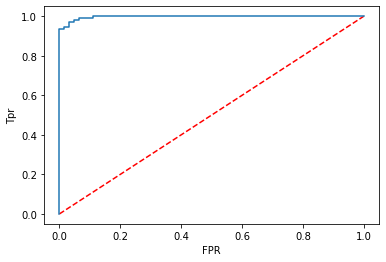

In [11]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],"r--")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("Tpr")
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.9969135802469136